In [ ]:
!pip install tensorflow==1.14

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time

import numpy
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()
import matplotlib.pyplot as plt

Loss at step 0: 13.912
Loss at step 1000: 1.243
Loss at step 2000: 1.006
Loss at step 3000: 1.002
Loss at step 4000: 1.002
Loss at step 5000: 1.002
Loss at step 6000: 1.002
Loss at step 7000: 1.002
Loss at step 8000: 1.002
Loss at step 9000: 1.002
Loss at step 10000: 1.002
Loss at step 11000: 1.002
Loss at step 12000: 1.002
Loss at step 13000: 1.002
Loss at step 14000: 1.002
Loss at step 15000: 1.002
Loss at step 16000: 1.002
Loss at step 17000: 1.002
Loss at step 18000: 1.002
Loss at step 19000: 1.002
W : 3.002567768096924 , b = 1.9934000968933105 


<function matplotlib.pyplot.show>

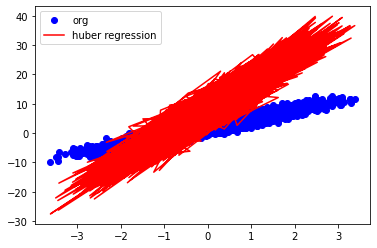

In [3]:
# Linear Regression with loss function, L2(Mean Squared Loss)

tf.set_random_seed(80)
numpy.random.seed(80)

# Create data
NUM_EXAMPLES = 10000

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = tf.Variable(0.)
b = tf.Variable(0.)

train_steps = 20000
learning_rate = 0.001

for i in range(train_steps):
  #watch the gradient flow
  with tf.GradientTape() as tape:
    #forward pass
    y_predicted = X * W + b
    #calcuate the loss (difference squared error)
    error = y_predicted - y
    loss = tf.reduce_mean(tf.square(error))

  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the parameters using Gradient Descent
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)


  if i % 1000 == 0:
    print("Loss at step {}: {:.3f}".format(i, loss))

print(f'W : {W.numpy()} , b = {b.numpy()} ')

plt.plot(X, y, 'bo',label='org')
plt.plot(X, y * W.numpy() + b.numpy(), 'r',
         label="huber regression")
plt.legend()
plt.show

Loss at step 0: 2.992
Loss at step 2000: 1.865
Loss at step 4000: 1.045
Loss at step 6000: 0.824
Loss at step 8000: 0.809
Loss at step 10000: 0.809
Loss at step 12000: 0.809
Loss at step 14000: 0.809
Loss at step 16000: 0.809
Loss at step 18000: 0.809
Loss at step 20000: 0.809
Loss at step 22000: 0.809
Loss at step 24000: 0.809
Loss at step 26000: 0.809
Loss at step 28000: 0.809
Loss at step 30000: 0.809
Loss at step 32000: 0.809
Loss at step 34000: 0.809
Loss at step 36000: 0.809
Loss at step 38000: 0.809
Loss at step 40000: 0.809
Loss at step 42000: 0.809
Loss at step 44000: 0.809
Loss at step 46000: 0.809
Loss at step 48000: 0.809
W : 3.0069191455841064 , b = 1.9853187799453735 


<function matplotlib.pyplot.show>

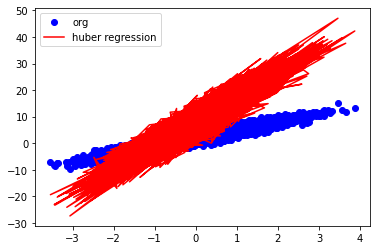

In [4]:
# Linear Regression with loss function, L1 loss

tf.set_random_seed(111)
numpy.random.seed(111)

# Create data
NUM_EXAMPLES = 10000

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = tf.Variable(0.)
b = tf.Variable(0.)

train_steps = 50000
learning_rate = 0.001

for i in range(train_steps):
  #watch the gradient flow
  with tf.GradientTape() as tape:
    #forward pass
    y_predicted = X * W + b
    #calcuate the loss (difference squared error)
    error = y_predicted - y
    loss = tf.reduce_mean(tf.abs(error))

  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the parameters using Gradient Descent
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)


  if i % 2000 == 0:
    print("Loss at step {}: {:.3f}".format(i, loss))

print(f'W : {W.numpy()} , b = {b.numpy()} ')

plt.plot(X, y, 'bo',label='org')
plt.plot(X, y * W.numpy() + b.numpy(), 'r',
         label="huber regression")
plt.legend()
plt.show

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Loss at step 0: 11.945
Loss at step 1000: 0.960
Loss at step 2000: 0.756
Loss at step 3000: 0.752
Loss at step 4000: 0.752
Loss at step 5000: 0.752
Loss at step 6000: 0.752
Loss at step 7000: 0.752
Loss at step 8000: 0.752
Loss at step 9000: 0.752
Loss at step 10000: 0.752
Loss at step 11000: 0.752
Loss at step 12000: 0.752
Loss at step 13000: 0.752
Loss at step 14000: 0.752
Loss at step 15000: 0.752
Loss at step 16000: 0.752
Loss at step 17000: 0.752
Loss at step 18000: 0.752
Loss at step 19000: 0.752
W : 3.002567768096924 , b = 1.4934000968933105 


<function matplotlib.pyplot.show>

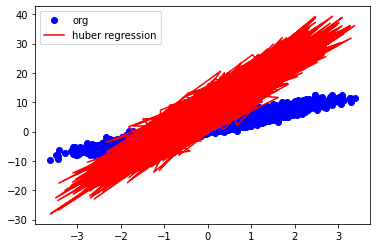

In [5]:
# Linear Regression with loss function, hybrid loss, loss = L1 + L2 loss

tf.set_random_seed(80)
numpy.random.seed(80)

# Create data
NUM_EXAMPLES = 10000

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = tf.Variable(0.)
b = tf.Variable(0.)

train_steps = 20000
learning_rate = 0.001

for i in range(train_steps):
  #watch the gradient flow
  with tf.GradientTape() as tape:
    #forward pass
    y_predicted = X * W + b
    #calcuate the loss (difference squared error)
    error = (y_predicted - y) + (y_predicted - y)**2
    loss = tf.reduce_mean((error))

  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the parameters using Gradient Descent
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)


  if i % 1000 == 0:
    print("Loss at step {}: {:.3f}".format(i, loss))

print(f'W : {W.numpy()} , b = {b.numpy()} ')

plt.plot(X, y, 'bo',label='org')
plt.plot(X, y * W.numpy() + b.numpy(), 'r',
         label="huber regression")
plt.legend()
plt.show

Loss at step 0: 9.072
Loss at step 1000: 0.913
Loss at step 2000: 0.761
Loss at step 3000: 0.758
Loss at step 4000: 0.758
Loss at step 5000: 0.758
Loss at step 6000: 0.758
Loss at step 7000: 0.758
Loss at step 8000: 0.758
Loss at step 9000: 0.758
Loss at step 10000: 0.758
Loss at step 11000: 0.758
Loss at step 12000: 0.758
Loss at step 13000: 0.758
Loss at step 14000: 0.758
Loss at step 15000: 0.758
Loss at step 16000: 0.758
Loss at step 17000: 0.758
Loss at step 18000: 0.758
Loss at step 19000: 0.758
W : 2.9888317584991455 , b = 1.5001280307769775 


<function matplotlib.pyplot.show>

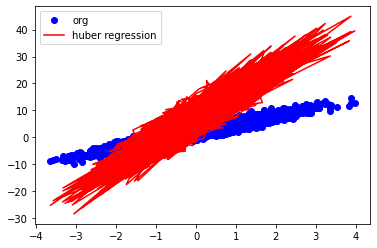

In [6]:
# Linear Regression with loss function, hybrid loss, loss = L1 + L2 loss, different seed, weights and bias are randomnly initialized

tf.set_random_seed(120)
numpy.random.seed(120)

# Create data
NUM_EXAMPLES = 10000

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = tf.Variable(numpy.random.randn)
b = tf.Variable(numpy.random.randn)

train_steps = 20000
learning_rate = 0.001

for i in range(train_steps):
  #watch the gradient flow
  with tf.GradientTape() as tape:
    #forward pass
    y_predicted = X * W + b
    #calcuate the loss (difference squared error)
    error = (y_predicted - y) + (y_predicted - y)**2
    loss = tf.reduce_mean((error))

  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the parameters using Gradient Descent
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)


  if i % 1000 == 0:
    print("Loss at step {}: {:.3f}".format(i, loss))

print(f'W : {W.numpy()} , b = {b.numpy()} ')

plt.plot(X, y, 'bo',label='org')
plt.plot(X, y * W.numpy() + b.numpy(), 'r',
         label="huber regression")
plt.legend()
plt.show